FWHM в кГц: 2.7699216320365667
Максимум спектра находится в точке x = 79.6818 МГц


Text(0.5, 1.0, 'Frequency Spectrum')

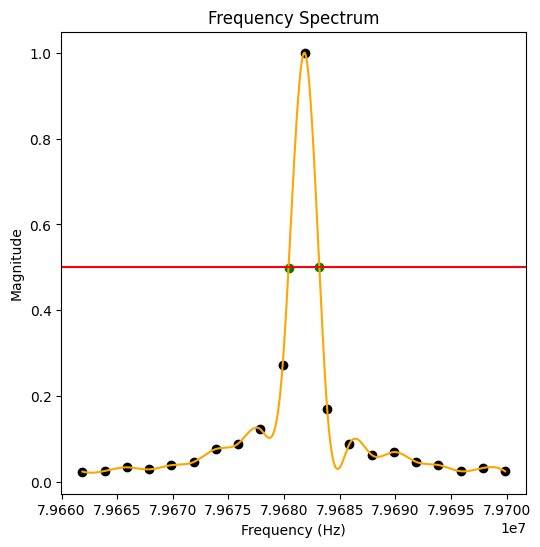

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import root_scalar

df = pd.read_csv('50mks0.csv')
#spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-2.5100E-04, 2.4900E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]

filtered_signal = fft_signal
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

freq_1 = []
fft_signal_1 = []
for i in range(len(freq)):
    if (freq[i]>79.66e6) and (freq[i]<79.7e6):
        freq_1.append(freq[i])
        fft_signal_1.append(abs(filtered_signal[i]))
        
spl_1 = interp1d(np.array(freq_1), np.array(fft_signal_1)/max(fft_signal_1), kind='cubic')
#spectr_new_1 = np.array(freq_1)
spectr_new_1 = np.linspace(freq_1[0], freq_1[-1], 10000)
Spectr_spl_1 = spl_1(spectr_new_1)

def difference(x):
    return spl_1(x) - 1/2
intersections_1 = []
crossings_1 = []
for i in range(len(spectr_new_1) - 1):
    a, b = spectr_new_1[i], spectr_new_1[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_1.append(sol.root)
        crossings_1.append((sol.root, Spectr_spl_1[i]))
print(f"FWHM в кГц: {(intersections_1[-1] - intersections_1[0])/1e3}")

# Поиск пиков
peaks, _ = find_peaks(Spectr_spl_1)
# Определение максимального пика
max_peak_index = peaks[np.argmax(Spectr_spl_1[peaks])]
# Значение по оси x для максимального пика
max_x_value = spectr_new_1[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value/1e6:.4f} МГц')

plt.figure(figsize=(6,6))
plt.plot(spectr_new_1, Spectr_spl_1, color='orange')
plt.axhline(y = 1/2, color = 'red')
plt.scatter(freq_1,fft_signal_1/max(fft_signal_1), color = 'k')
plt.scatter([c[0] for c in crossings_1], [c[1] for c in crossings_1], color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')